In [1]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from itertools import count
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import math
%matplotlib inline

In [2]:
ground_truth = np.vectorize(lambda x : math.sin(2 * math.pi * x))

In [3]:
def train ( f, N:int, degree:int, gaussian_mean=0, gaussian_variance=0.05, plt_ax=None, train_ratio=.8):
    if plt_ax == None:
        _fig, ax = plt.subplots()
    else:
        ax = plt_ax
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    xx = np.random.random(N).reshape(-1,1)
    noise = np.random.normal(gaussian_mean, gaussian_variance, N).reshape(-1,1)
    yy = f(xx) + noise
    n_train = int(N * train_ratio)
    x_train = xx[:n_train]
    y_train = yy[:n_train]
    x_test = xx[n_train:]
    y_test = yy[n_train:]
    model.fit(x_train,y_train)
    ax.scatter(xx, yy, label='a')
    lspc = np.linspace(0,1,50).reshape(-1,1)
    ax.plot(lspc,model.predict(lspc), label='b')
    ax.grid()
    return mean_squared_error(y_test, model.predict(x_test))

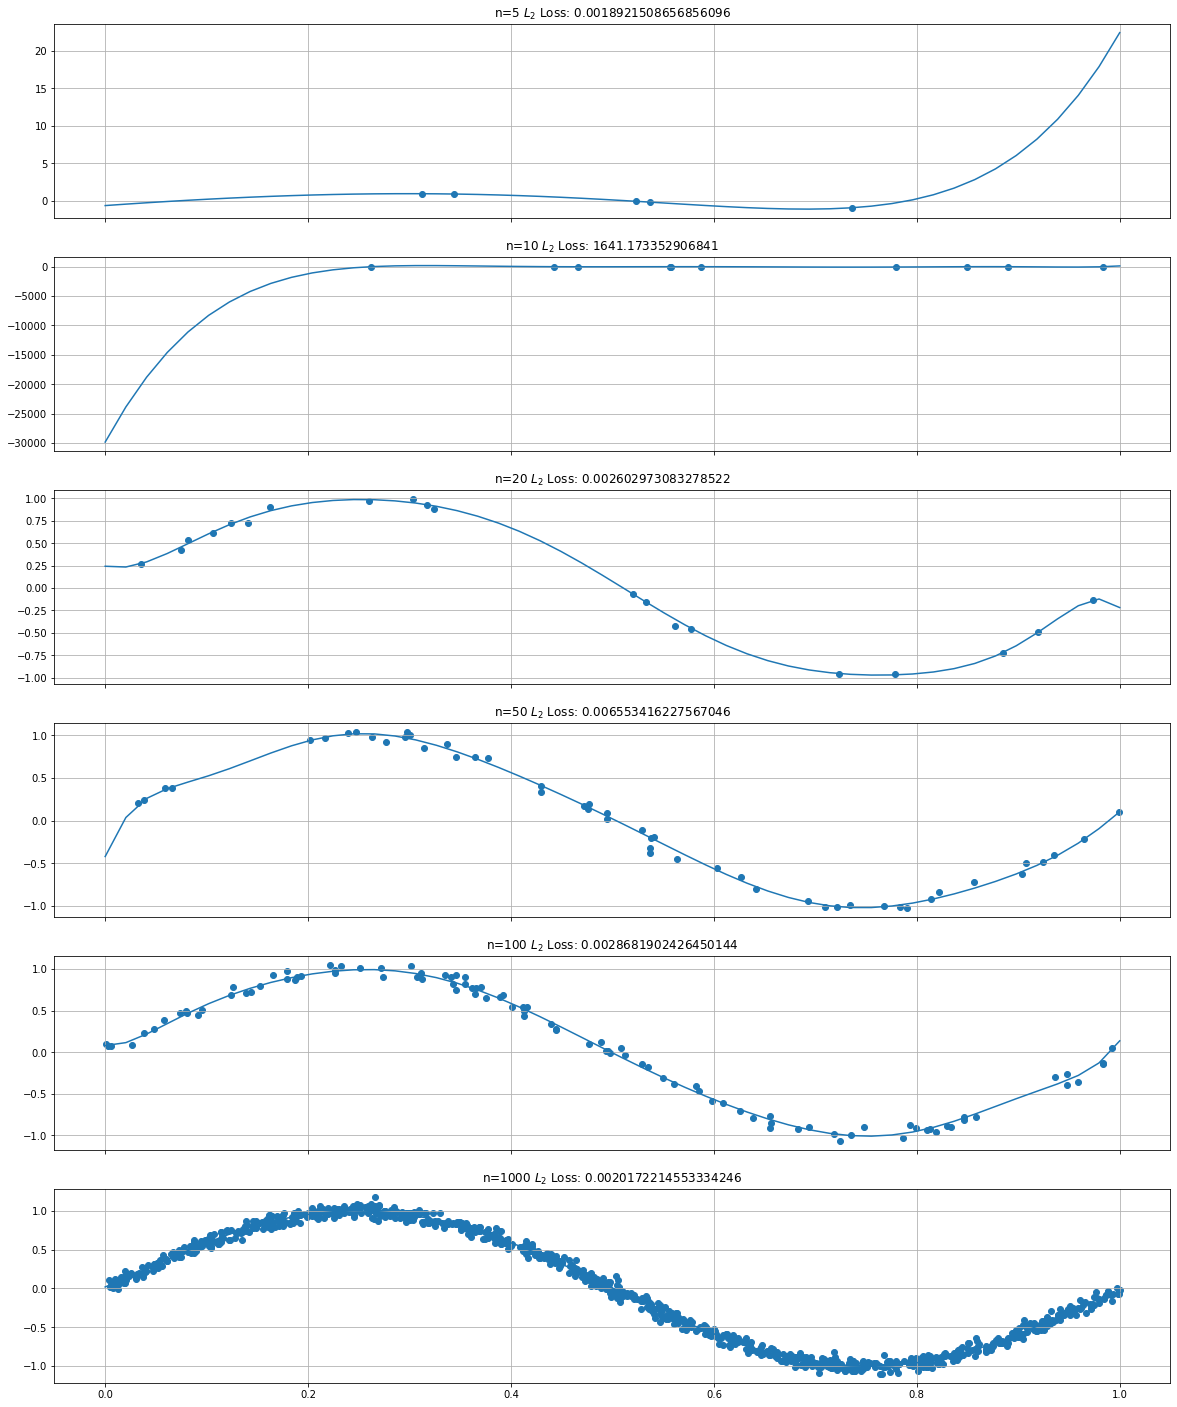

In [4]:
n_list = [5,10,20,50,100,1000]
fig = plt.figure(figsize=[20,25])
axes = fig.subplots(len(n_list),1, sharex=True)
for i, n in enumerate(n_list):
    mae = train(ground_truth, n, 10, plt_ax=axes[i])
    axes[i].set_title(f"{n=} $ L_2 $ Loss: {mae}")